In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [2]:
from get_clean_data_LinReg import get_data, clean_data, get_feats, get_target, partition_feats_by_ptp_cnt, get_feats_with_plan_name
from plot_results_and_residuals import plot_results, plot_residuals, plot_student_residuals

<h3>Variable List: </h3>
<ul><li>model_dict : Dictionary of linear regression models fit with 2014 data divided by plan participant count
<li>partitioned_dict_of_df_XX : Dictionary of tuples:<br>X (features matrix): Pandas dataframes of 20XX plan features divided by plan participant count, <br>y (target series): Pandas Series of 20XX+1 actual funding target 
<li>predict_dict_XX : Dictionary of predicted 20XX+1 funding targets (predicted off 20XX features)
<li>student_resids_XX : Dictionary of studentized residuals

<h1>Get training data: 2014 Schedule SB, H and Form 5500 filing fields </h1>
<h3>In dictionary with keys = participant count range (partitions)</h3>

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>
<h3>Interaction Features:</h3>
    <ul><li>Effective interst rate x prior year funding target
        <li>Effective interst rate x prior year target normal cost (expected growth in funding target)
        <li>Effective interst rate x prior year benefits paid (1/2 year)
    </ul>

In [3]:
partitioned_dict_of_df_14 = partition_feats_by_ptp_cnt(2014)

In [4]:
partition_list = [(0,50),(50,300),(300,500),(500,800),(800,1500),(1500,2500),(2500,5000),(5000,10000),(10000,50000),(50000,100000),(100000,500000)]

<b>Number of plans in each partition of data</b>:

In [5]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_14[i][0]))

(0, 50) : 7
(50, 300) : 4385
(300, 500) : 2113
(500, 800) : 1764
(800, 1500) : 2152
(1500, 2500) : 1447
(2500, 5000) : 1499
(5000, 10000) : 1075
(10000, 50000) : 946
(50000, 100000) : 159
(100000, 500000) : 81


<h1>Create dictionary of linear models (OLS) fitted on 2014 partitioned data</h1>

In [6]:
model_dict = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_14[i]
    #X = sm.add_constant(X)
    model_dict[i] = DecisionTreeRegressor().fit(X, y)
    print(model_dict[i].score(X,y))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


<h1>Test on 2015 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [7]:
partitioned_dict_of_df_15 = partition_feats_by_ptp_cnt(2015)

<b>Distribution of plan sizes</b>

In [ ]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_15[i][0]))

In [8]:
predict_dict_15 = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_15[i]
    #X = sm.add_constant(X)
    predict_dict_15[i] = model_dict[i].predict(X)

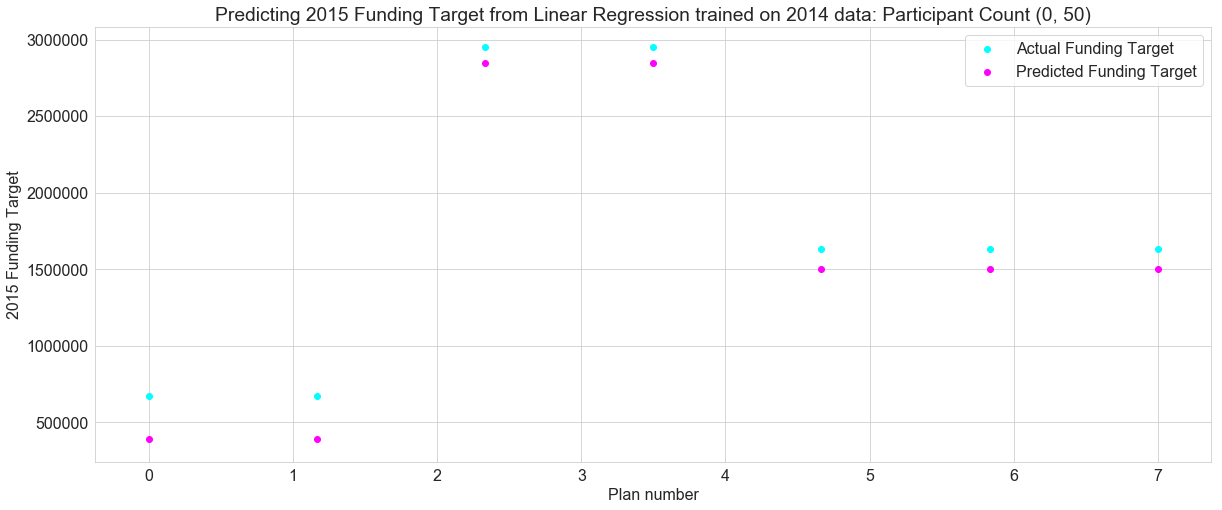

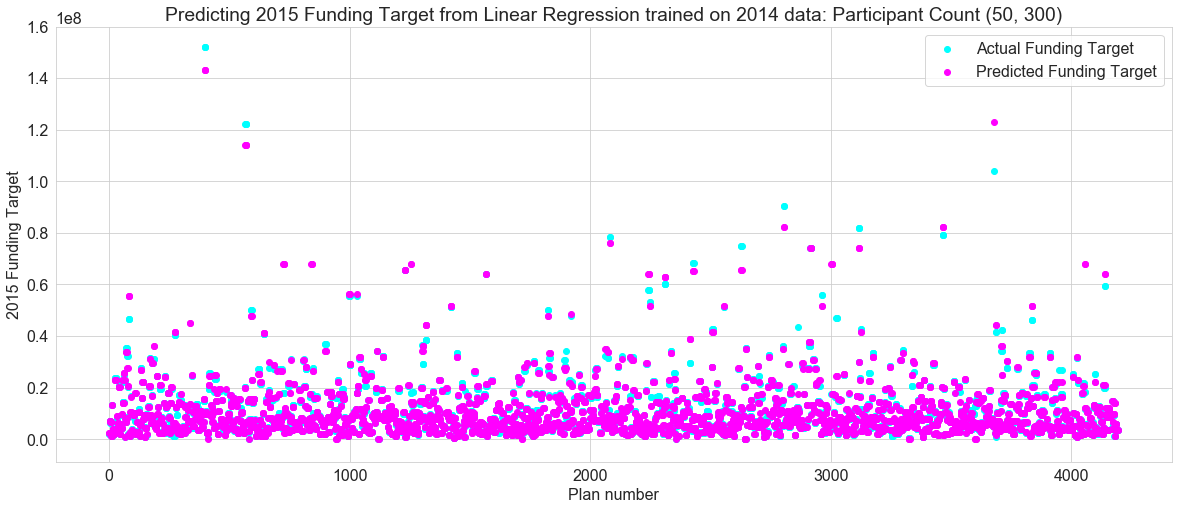

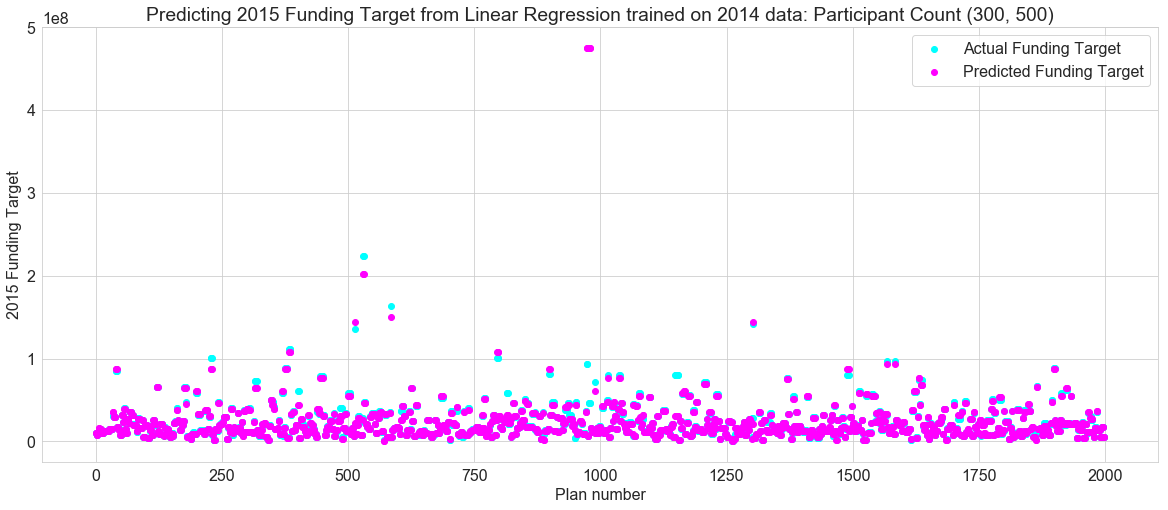

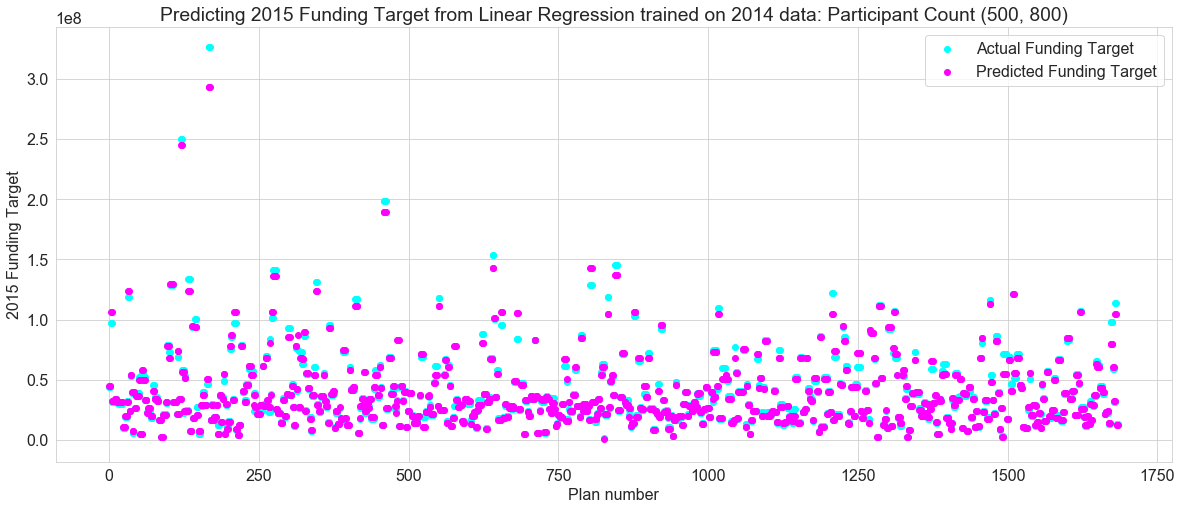

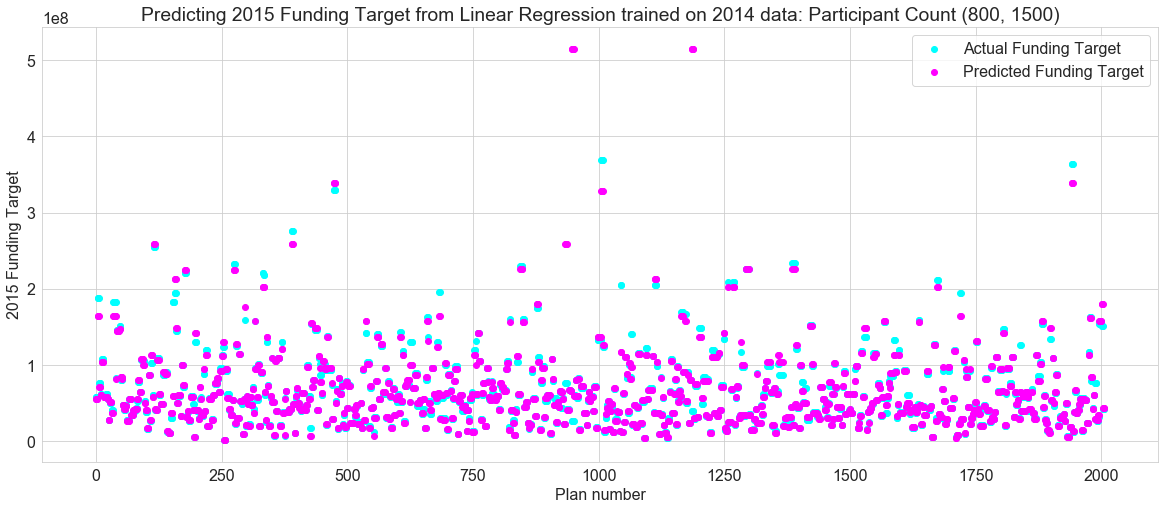

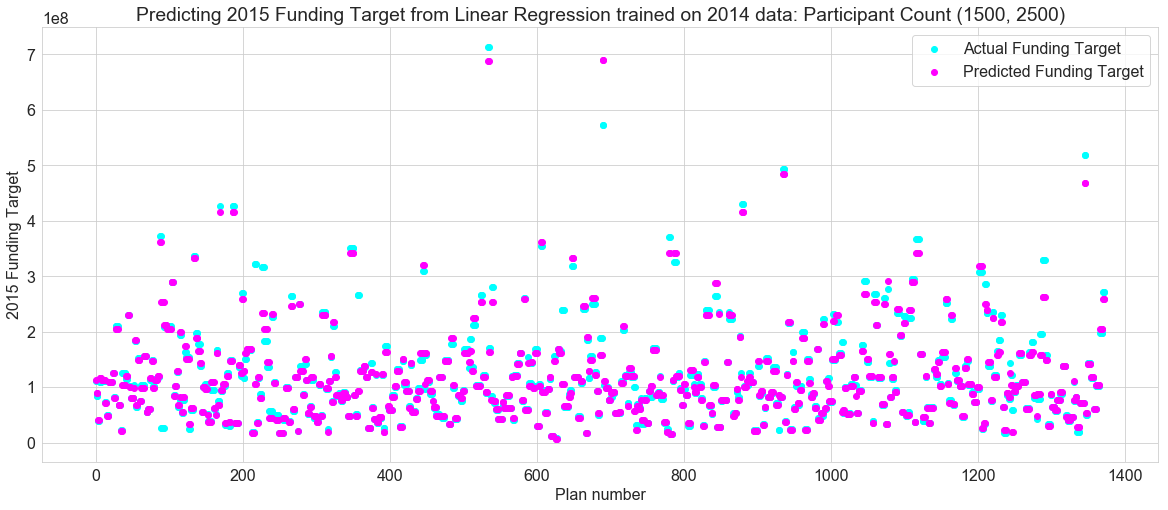

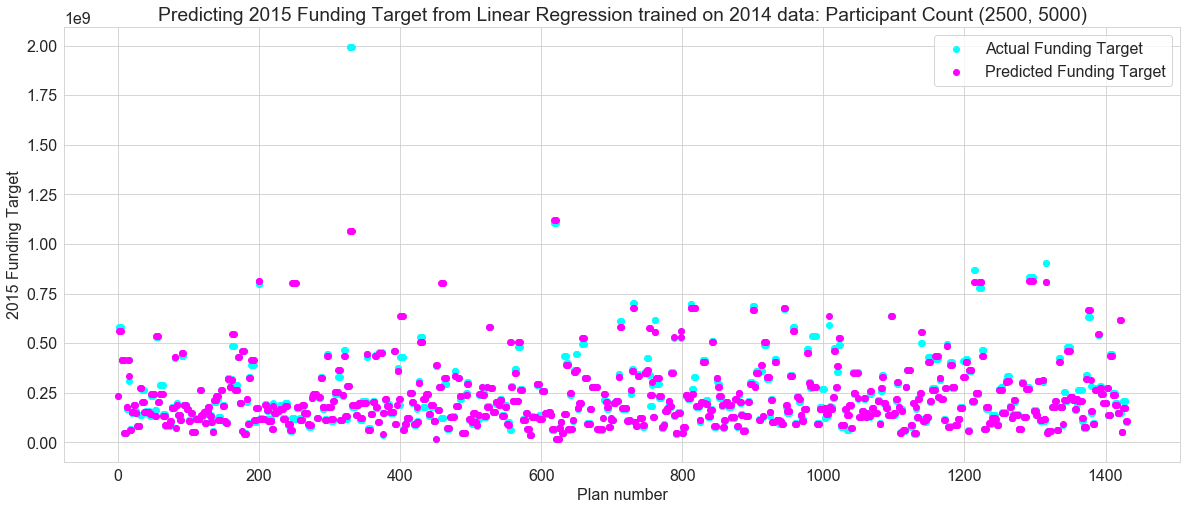

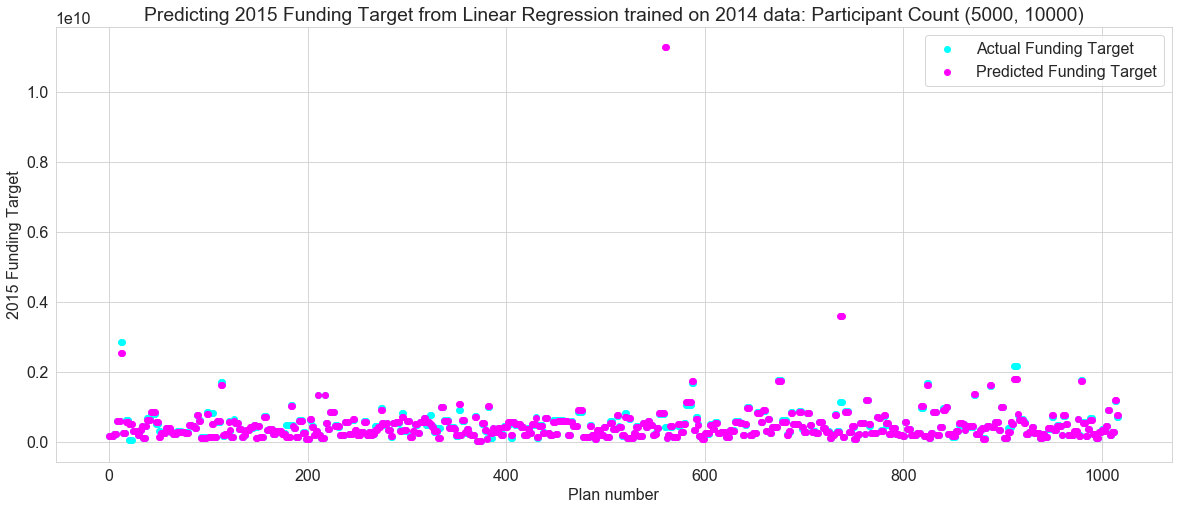

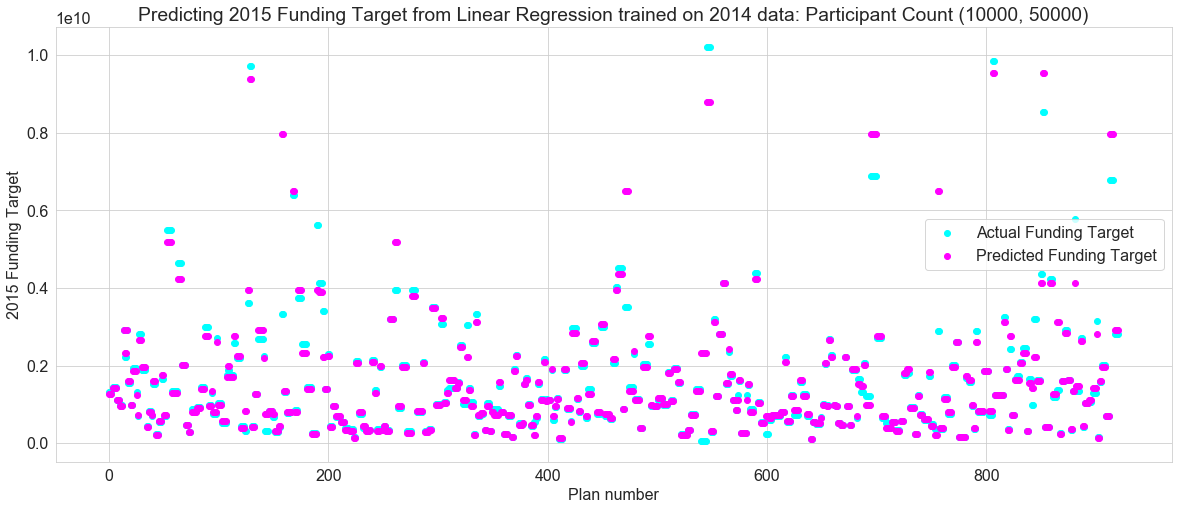

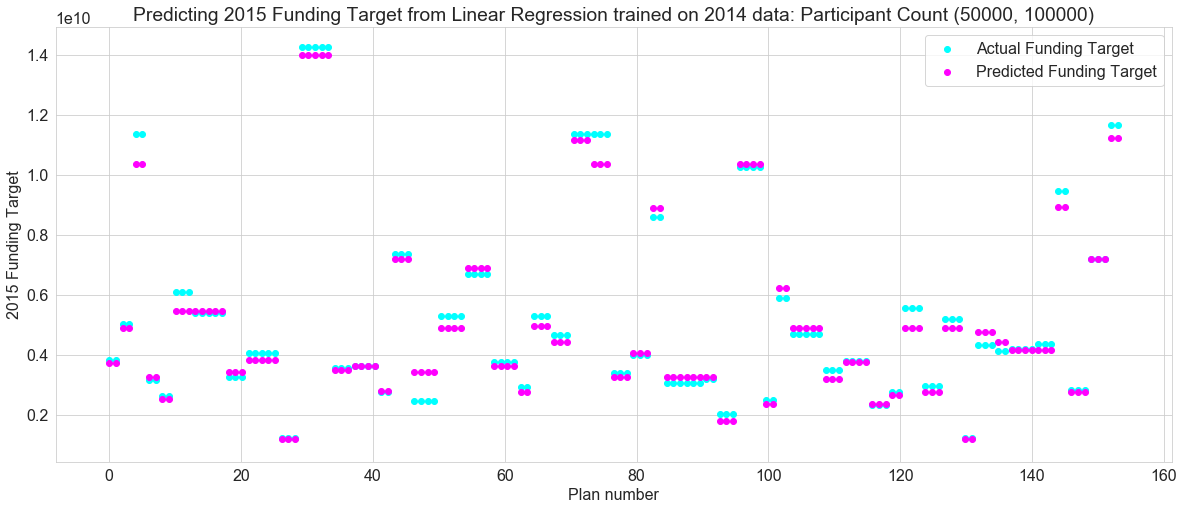

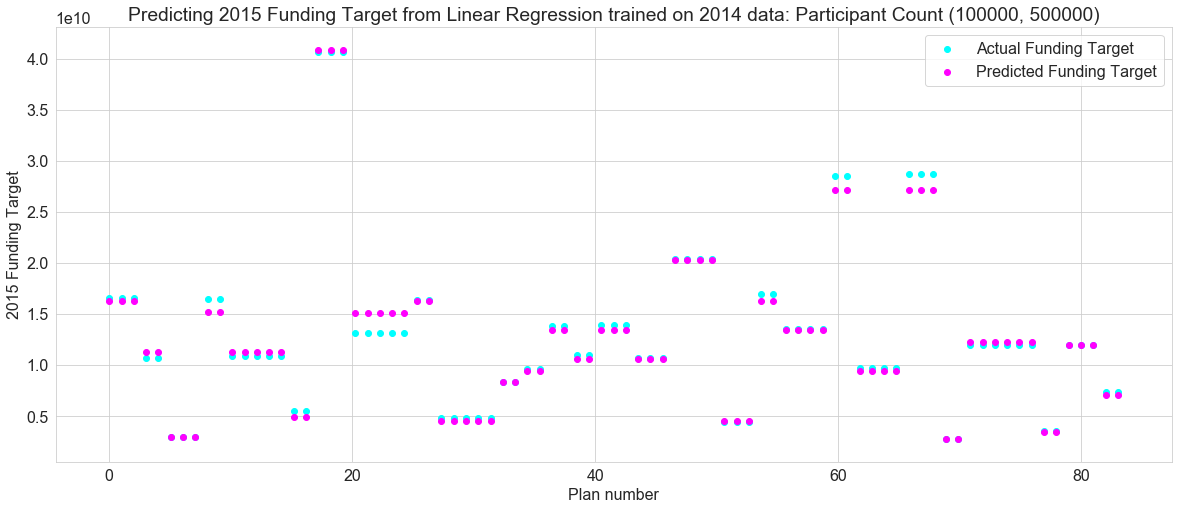

In [9]:
for i in partition_list:
    y_true = partitioned_dict_of_df_15[i][1]
    y_pred = predict_dict_15[i]
    plot_results(y_true, y_pred, i, 2015)

<h1>Test on 2016 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [11]:
partitioned_dict_of_df_16 = partition_feats_by_ptp_cnt(2016)

In [12]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_16[i][0]))

(0, 50) : 0
(50, 300) : 628
(300, 500) : 239
(500, 800) : 142
(800, 1500) : 150
(1500, 2500) : 119
(2500, 5000) : 89
(5000, 10000) : 75
(10000, 50000) : 57
(50000, 100000) : 15
(100000, 500000) : 8


In [16]:
predict_dict_16 = {}
studentized_resids_16 = {}
for i in partition_list[1:]:
    X, y = partitioned_dict_of_df_16[i]
    #X = sm.add_constant(X)
    predict_dict_16[i] = model_dict[i].predict(X)

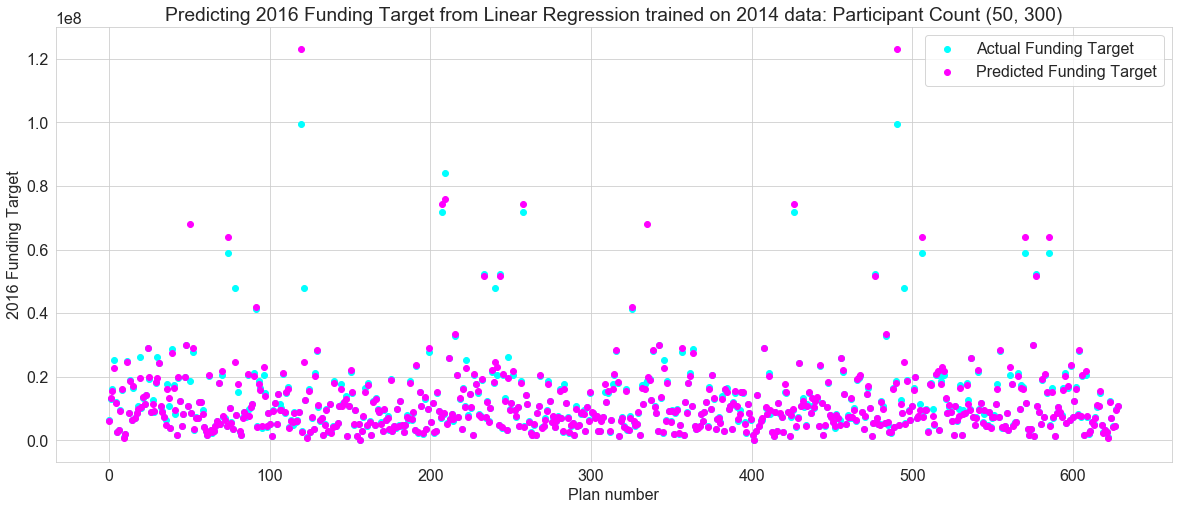

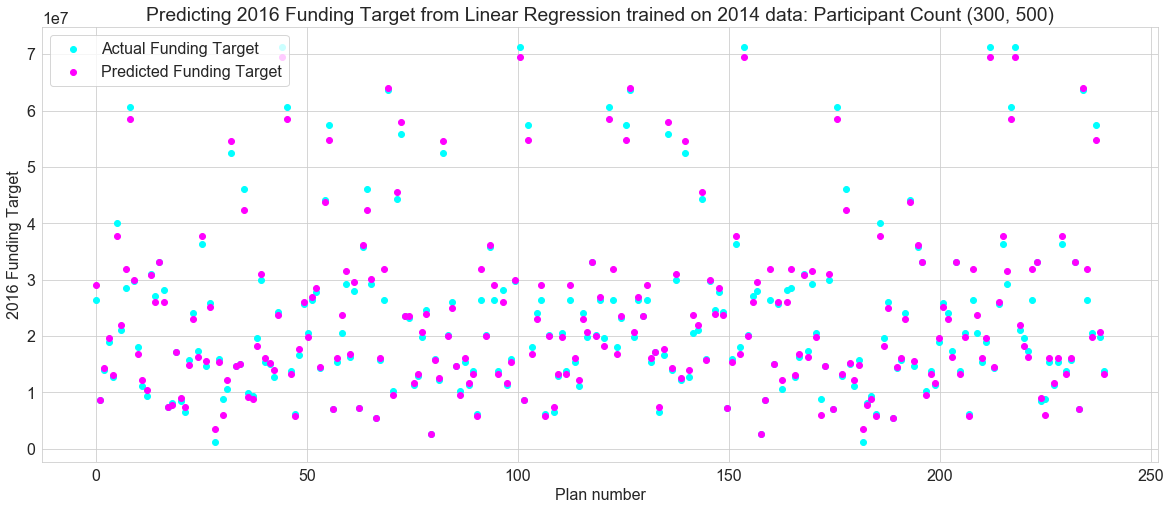

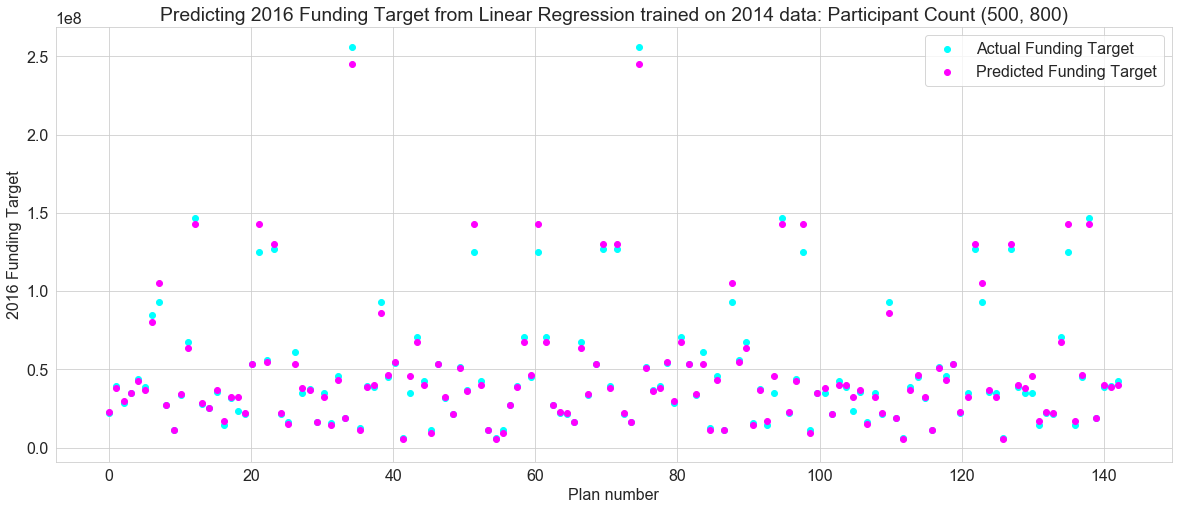

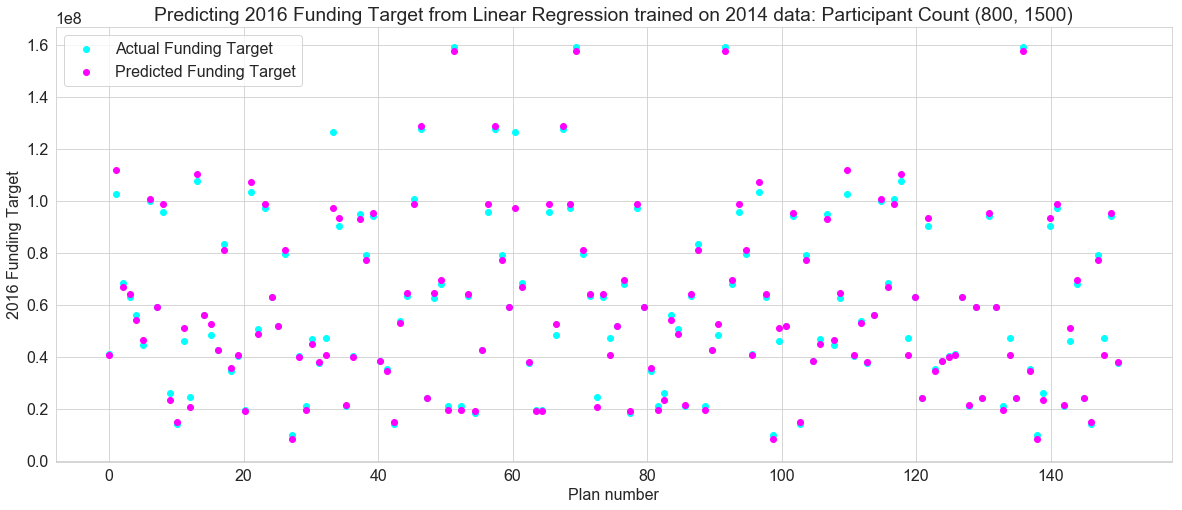

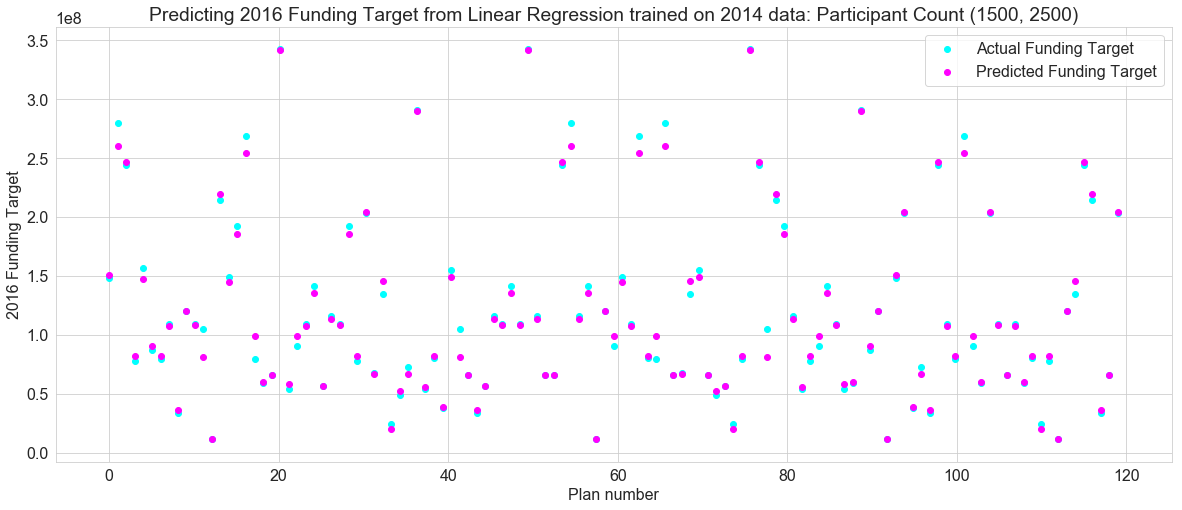

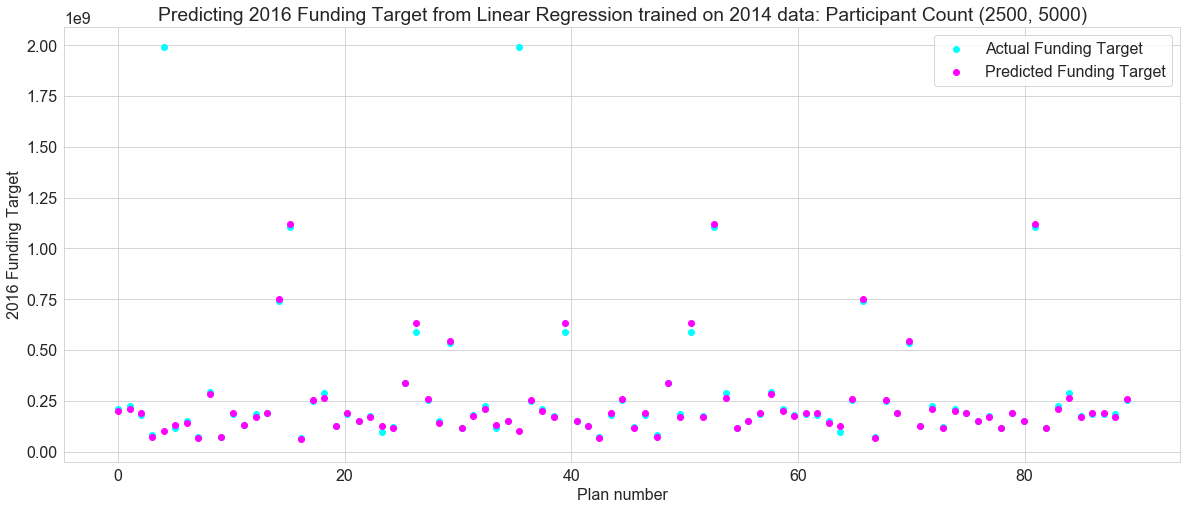

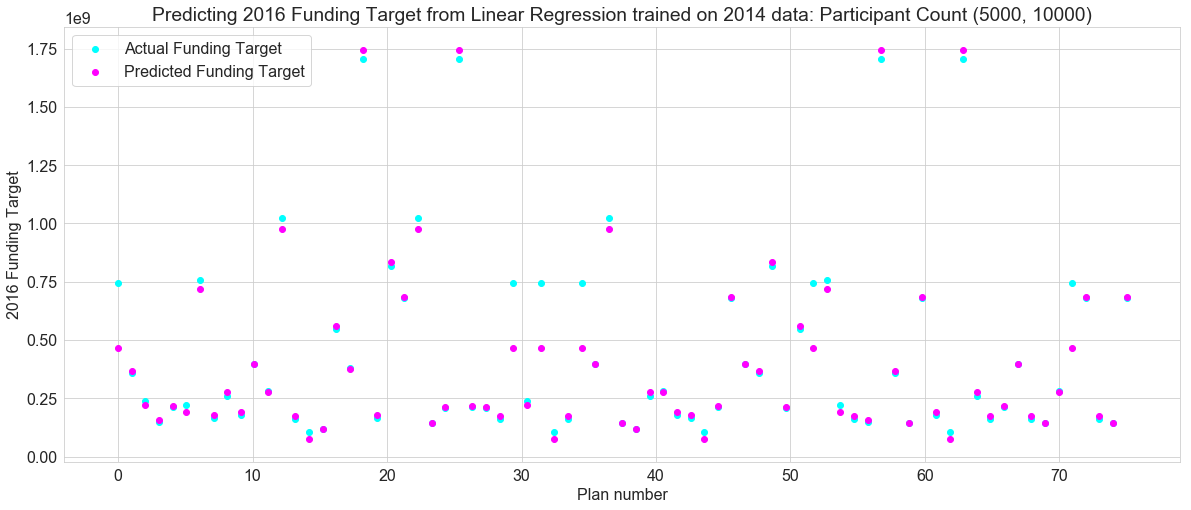

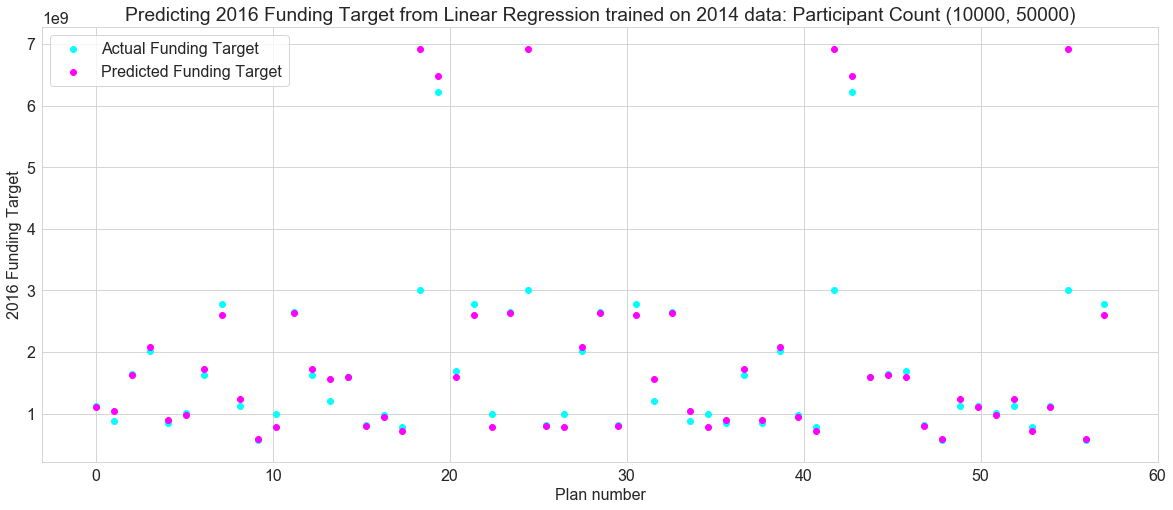

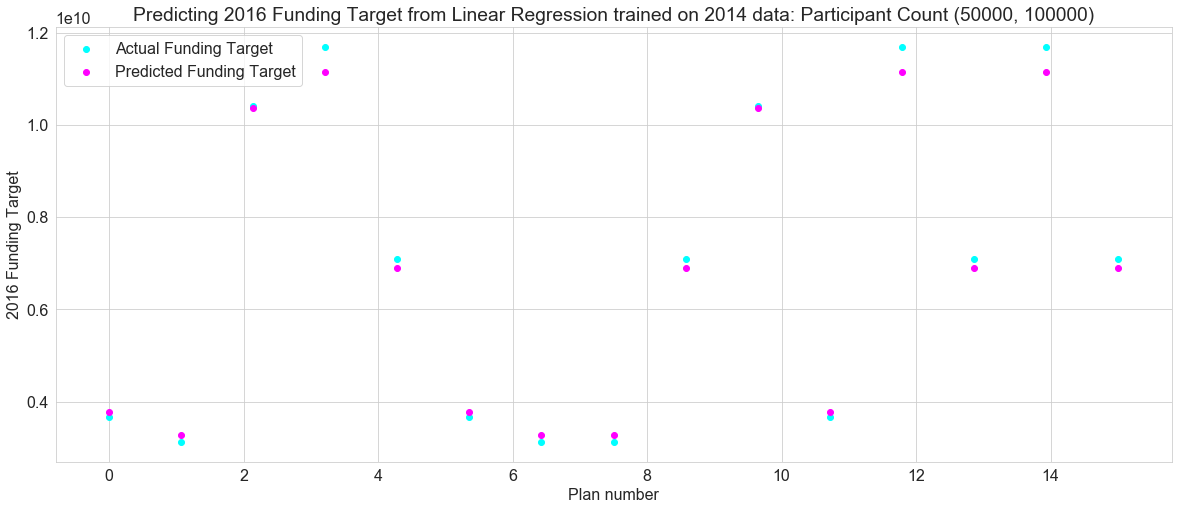

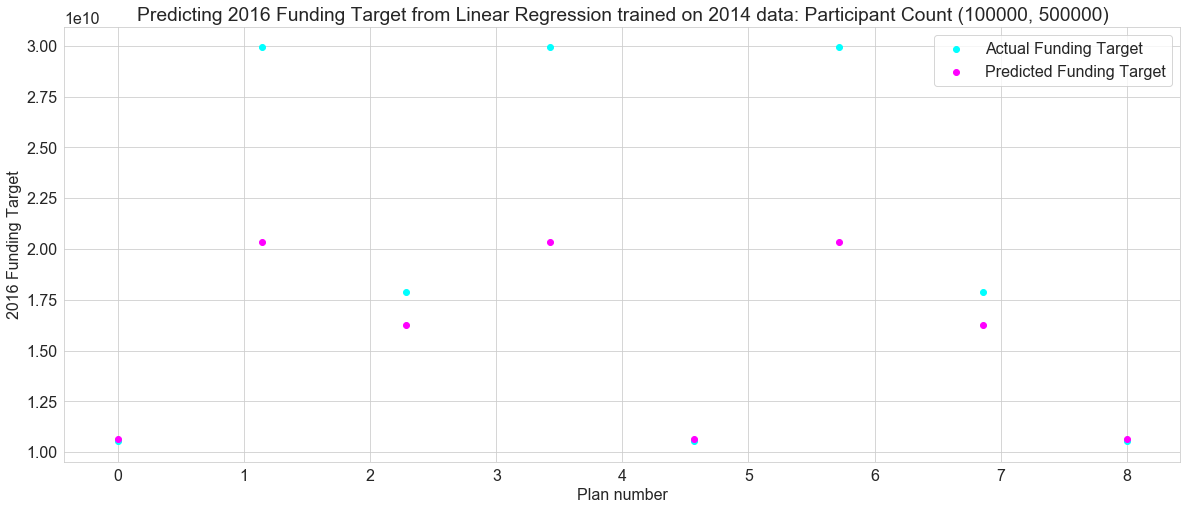

In [18]:
for i in partition_list[1:]:
    y_true = partitioned_dict_of_df_16[i][1]
    y_pred = predict_dict_16[i]
    plot_results(y_true, y_pred, i, 2016)